-----JOB-SCHEDULING-WITH-UNCERTAIN-PROCESSING-TIMES-----

		 Best solution: [4, 3, 0, 2, 1]

		 Cost: 137.27764205278663


---------GANTT--CHART--ABOUT--START--AND--END--TIMES-----------





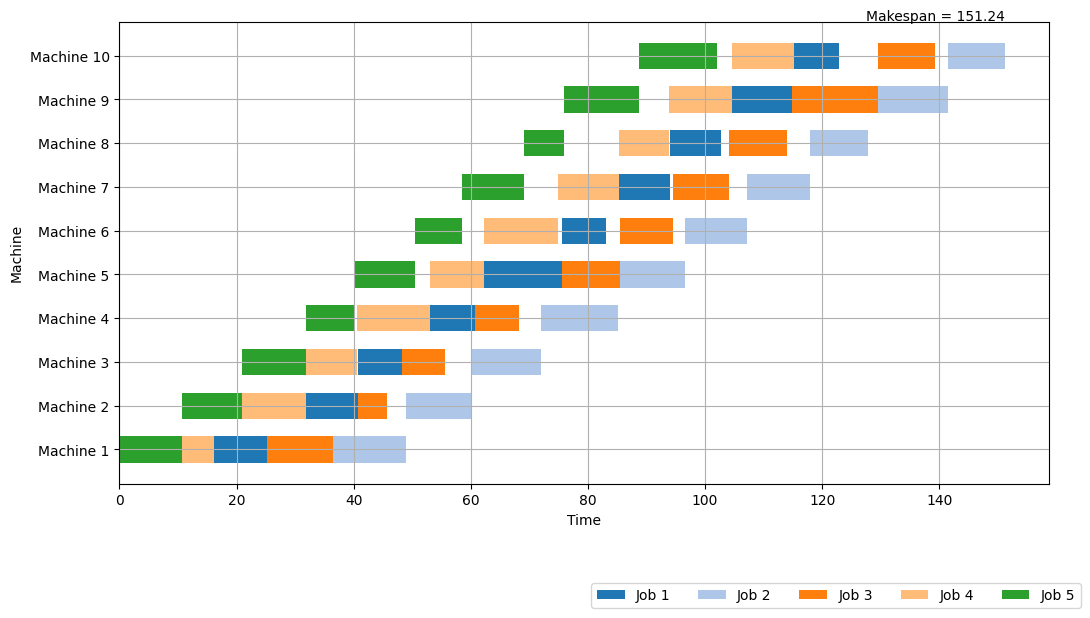

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


def simulated_annealing(problem, max_iterations=1000, init_temp=100.0, cooling_rate=0.01):
    current_solution = problem.get_initial_solution()
    current_cost = problem.get_cost(current_solution)
    best_solution = current_solution
    best_cost = current_cost
    temperature = init_temp

    for i in range(max_iterations):
        next_solution = problem.get_neighbor_solution(current_solution)
        next_cost = problem.get_cost(next_solution)

        delta = next_cost - current_cost
        acceptance_prob = np.exp(-delta / temperature)

        if delta < 0 or random.random() < acceptance_prob:
            current_solution = next_solution
            current_cost = next_cost

            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

        temperature *= (1 - cooling_rate)

    return best_solution, best_cost


class JobShopProblem:
    def __init__(self, num_jobs, num_machines, processing_times):
        self.num_jobs = num_jobs
        self.num_machines = num_machines
        self.processing_times = processing_times

    def get_initial_solution(self):
        return list(range(self.num_jobs))

    def get_neighbor_solution(self, current_solution):
        next_solution = current_solution.copy()
        i, j = random.sample(range(self.num_jobs), 2)
        next_solution[i], next_solution[j] = next_solution[j], next_solution[i]
        return next_solution


    def get_cost(self, solution):
        completion_times = np.zeros((self.num_jobs, self.num_machines))
        for i, job in enumerate(solution):
            for machine in range(self.num_machines):
                if i == 0:
                    if machine == 0:
                        completion_times[job][machine] = np.random.normal(self.processing_times[job][machine], 2)
                    else:
                        completion_times[job][machine] = completion_times[job][machine-1] + np.random.normal(self.processing_times[job][machine], 2)
                else:
                    if machine == 0:
                        completion_times[job][machine] = completion_times[solution[i-1]][machine] + np.random.normal(self.processing_times[job][machine], 2)
                    else:
                        completion_times[job][machine] = max(completion_times[solution[i-1]][machine], completion_times[job][machine-1]) + np.random.normal(self.processing_times[job][machine], 2)
        return np.max(completion_times)

    def plot_gantt_chart(self, solution):
        completion_times = np.zeros((self.num_jobs, self.num_machines))
        job_starts = np.zeros((self.num_jobs, self.num_machines))
        job_ends = np.zeros((self.num_jobs, self.num_machines))
        for i, job in enumerate(solution):
            for machine in range(self.num_machines):
                if i == 0 and machine == 0:
                    completion_times[job][machine] = self.processing_times[job][machine]
                    job_starts[job][machine] = 0
                    job_ends[job][machine] = completion_times[job][machine]
                else:
                    completion_times[job][machine] = max(completion_times[solution[i-1]][machine], completion_times[job][machine-1]) + self.processing_times[job][machine]
                    job_starts[job][machine] = completion_times[solution[i-1]][machine] if completion_times[solution[i-1]][machine] > completion_times[job][machine-1] else completion_times[job][machine-1]
                    job_ends[job][machine] = completion_times[job][machine]

        job_labels = [f"Job {i+1}" for i in range(self.num_jobs)]
        machine_labels = [f"Machine {i+1}" for i in range(self.num_machines)]
        
        fig, ax = plt.subplots(figsize=(12,6))
        ax.set_xlabel("Time")
        ax.set_ylabel("Machine")
        ax.set_yticks(np.arange(self.num_machines))
        ax.set_yticklabels(machine_labels)
        ax.grid(True)
        
        for i in range(self.num_jobs):
            for j in range(self.num_machines):
                job_start = job_starts[i][j]
                job_end = job_ends[i][j]
                if j==0:
                  ax.barh(j, job_end - job_start, left=job_start, height=0.6, label=job_labels[i], color=plt.cm.tab20(i))
                else:
                  ax.barh(j, job_end - job_start, left=job_start, height=0.6, color=plt.cm.tab20(i))
        # Calculate the makespan
        makespan = np.max(completion_times)
        # Display the makespan as text in the plot
        ax.text(makespan, self.num_machines-0.1, f"Makespan = {makespan:.2f}", ha='right', va='center')
        
        ax.legend(loc='upper left', bbox_to_anchor=(0.5, -0.2), ncol=self.num_jobs)
        plt.show()

if __name__ == '__main__':
    num_jobs = 5
    num_machines = 10
    processing_times = np.random.normal(10, 2, size=(num_jobs, num_machines))
    problem = JobShopProblem(num_jobs, num_machines, processing_times)
    solution, cost = simulated_annealing(problem)
    print("-----JOB-SCHEDULING-WITH-UNCERTAIN-PROCESSING-TIMES-----")
    print("\n\t\t Best solution:", solution)
    print("\n\t\t Cost:", cost)
    
    print("\n\n---------GANTT--CHART--ABOUT--START--AND--END--TIMES-----------\n\n\n")
    problem.plot_gantt_chart(solution)

